# OrionKL test with method 2

In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v2 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

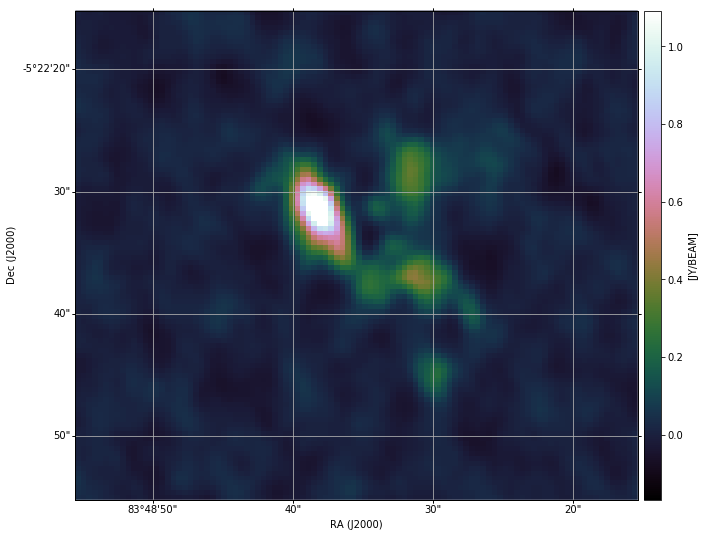

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

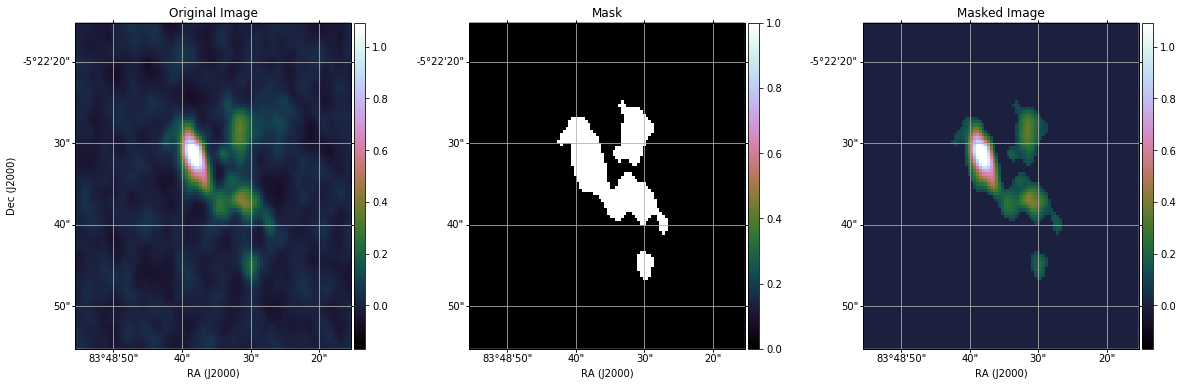

back_level:  0.10237737624469602


In [3]:
preprocessing(data, wcs)

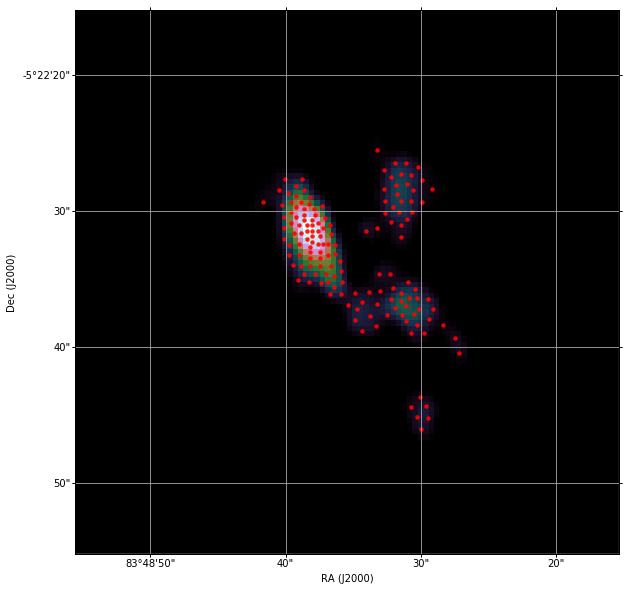

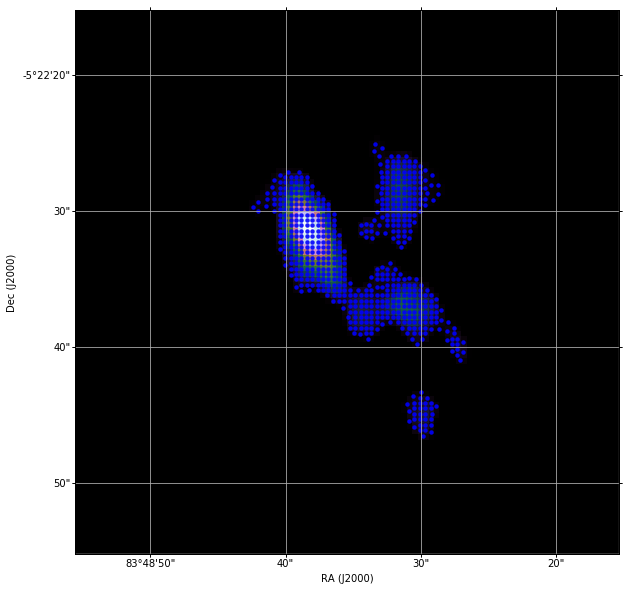

In [4]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_center=150)

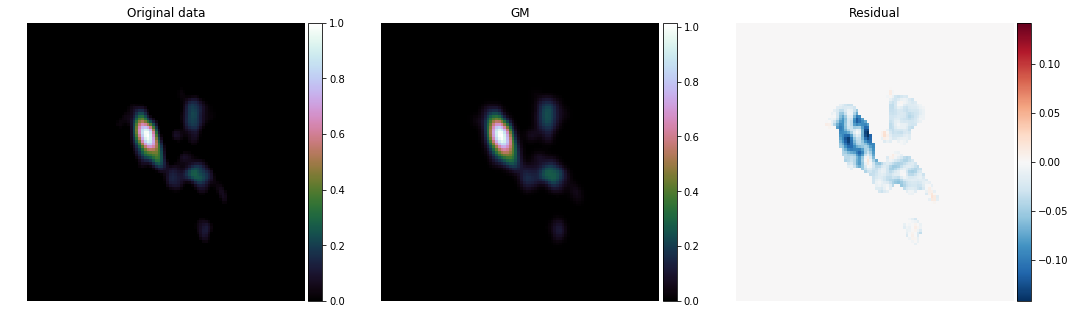

RESIDUAL STATS
RMS of residual: 0.012018783884204147
Inf norm of residual: 0.14208162514039588
Variance of residual: 0.0001386753068227681
Normalized flux addition: 0.21802613987991518
Normalized flux lost: 0.0032072500830117325


In [5]:
hdmc.get_residual_stats();

In [6]:
%%prun -s tottime -q -l 30 -T hdmc_m2_prof
hdmc.build_gmr()

 
*** Profile printout saved to text file 'hdmc_m2_prof'. 


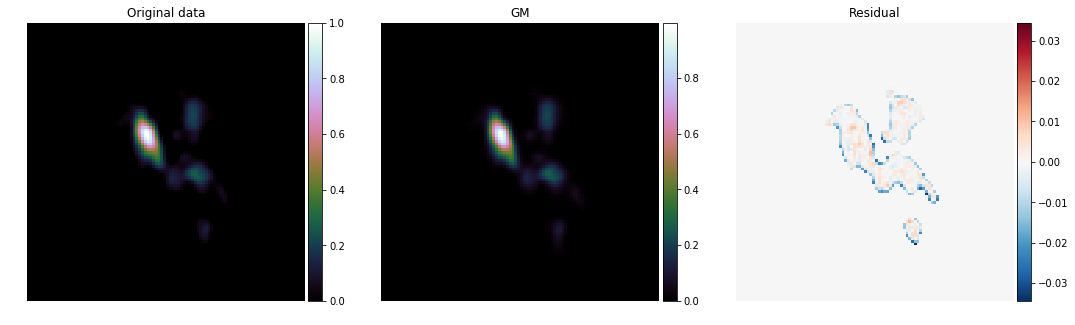

RESIDUAL STATS
RMS of residual: 0.0019343633259755026
Inf norm of residual: 0.0343824420799581
Variance of residual: 3.717861449449738e-06
Normalized flux addition: 0.0224325310440081
Normalized flux lost: 0.008613952627691296


In [7]:
hdmc.get_residual_stats();

In [8]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120200.
nfev: 120227
xtol: 1e-07
ftol: 1e-07


In [9]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 109.21156907081604


In [10]:
w,sig,theta = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))
print("theta variation: ",np.max(np.abs(hdmc.theta0-theta)))

PARAMETERS VARIATION:
w variation:  0.1993496853444615
sig variation:  0.0445751274549778
theta variation:  6.277833316113334


In [11]:
w,sig,theta = hdmc.get_params_mapped()

#### Profiling results

In [12]:
print(open('hdmc_m2_prof', 'r').read())

         8781532 function calls (8779320 primitive calls) in 109.212 seconds

   Ordered by: internal time
   List reduced from 155 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   120229   52.942    0.000   52.942    0.000 {fgm_eval.gm_eval_full_thread}
        1   31.998   31.998  109.197  109.197 {built-in method scipy.optimize._minpack._lmdif}
   360687    5.466    0.000   10.639    0.000 necompiler.py:750(evaluate)
   120229    4.478    0.000    7.736    0.000 hdmclouds_v2.py:36(d1psi1)
   120229    3.234    0.000    3.234    0.000 utils.py:139(sig_mapping)
   120229    2.383    0.000   77.213    0.001 hdmclouds_v2.py:369(F)
   120229    1.613    0.000    1.613    0.000 {fgm_eval.gm_eval_full}
   360687    1.372    0.000    2.240    0.000 necompiler.py:725(getArguments)
   360690    1.184    0.000    1.572    0.000 necompiler.py:534(getContext)
   120229    1.065    0.000    1.065    0.000 utils.py:142(theta_mapping)
   7213

***
***

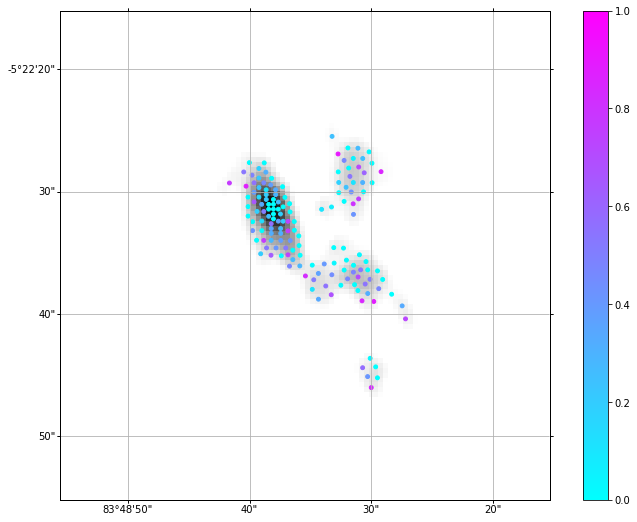

In [13]:
eccentricity_plot(hdmc.data, hdmc.xc, hdmc.yc, hdmc.get_params_mapped()[1], wcs=wcs)